In [1]:
import scipy.signal as signal
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from PIL import Image, ImageDraw 
import cv2
import colour as cs

In [65]:
directory = 'HS_images'
matrix_sensitive = 'matrix_sensitive/Canon50D.txt'


In [66]:
files = os.listdir(directory)
images = list(filter(lambda x: x.endswith('.mat'), files))

In [67]:
try:
    calibr = open(directory + '/calib.txt').read().split()
except:
    calibr = np.ones([31])
    print('Calibr file not found')

In [68]:
F = open(matrix_sensitive)
Canon50D = F.read().split()

for i in range(99):
    Canon50D[i] = float(Canon50D[i])

red_ch = np.array(Canon50D[2:33])
green_ch = np.array(Canon50D[35:66])
blue_ch = np.array(Canon50D[68:99])



In [69]:
def apply_gamma(input_image: np.ndarray, gamma: float) -> np.ndarray:
    return (cs.gamma_function(input_image / 255, gamma, 'Clamp') * 255).astype(np.uint8)

In [70]:
def HypToRGB(name):
    
    mat = scipy.io.loadmat(directory + '/' + name)
    
    I = mat['ref']
    I = I[8: 1040-8, 184: 1392-184]
    
    for i in range(np.shape(I)[2]):
        I[:,:,i] = I[:,:,i] / float(calibr[i])
    
    K = I.copy()

    Y = np.zeros([np.shape(I)[0],np.shape(I)[1],31])
    
    for x in range(np.shape(I)[0]):
        for y in range(np.shape(I)[1]):
            Y[x,y,0] = np.sum(K[x,y,:] * red_ch[:])
            Y[x,y,1] = np.sum(K[x,y,:] * green_ch[:])
            Y[x,y,2] = np.sum(K[x,y,:] * blue_ch[:])

    
    temp = np.zeros( [np.shape(Y)[0], np.shape(Y)[1], 3 ])
    temp[:,:,0] = Y[:,:,0] / np.max(Y[:,:,0]) * 255
    temp[:,:,1] = Y[:,:,1] / np.max(Y[:,:,1]) * 255
    temp[:,:,2] = Y[:,:,2] / np.max(Y[:,:,2]) * 255
    
    temp = apply_gamma(temp, 1 / 2.0)
    
    return temp

In [71]:
RGB_images = []
for name in images:
    RGB_images.append(HypToRGB(name))
    print(name + ' was converted to RGB')

img1.mat was converted to RGB
img2.mat was converted to RGB
imga1.mat was converted to RGB
imga2.mat was converted to RGB


In [73]:
i = 0
for img in RGB_images:    
    img = cv2.cvtColor(img.astype('float32'), cv2.COLOR_BGR2RGB)
    cv2.imwrite('RGB/' + str(i) + '.png', (img))
    i += 1

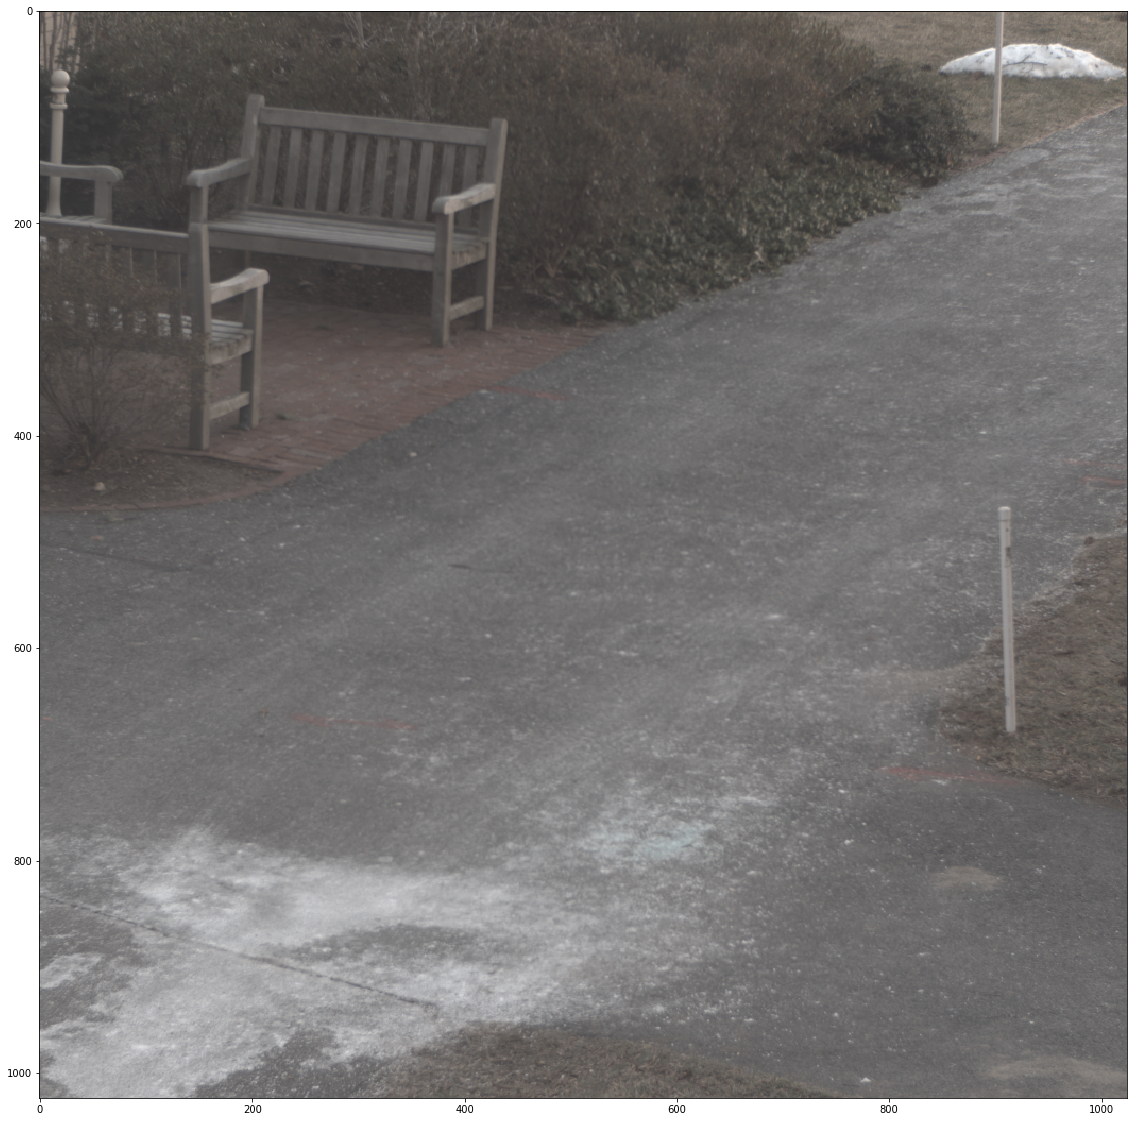

In [62]:
fig, axes = plt.subplots(1, 1)

axes.imshow(np.uint(RGB_images[5]))
fig.set_figwidth(20)   
fig.set_figheight(20)    

plt.show()